# Time Series Analysis and Forecasting for Stock Market

Install libraries

In [1]:
# Install all required libraries (compatible with numpy >= 1.26)
!pip install pandas matplotlib seaborn plotly yfinance
!pip install scikit-learn
!pip install statsmodels
!pip install tensorflow keras
!pip install prophet
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


import Libraries

In [2]:
# Data & Visualization
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ML Models
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Time Series Models (Compatible)
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# Deep Learning for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# Misc
import warnings
warnings.filterwarnings("ignore")


download dataset

In [3]:
# Download from Yahoo Finance
data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.dropna(inplace=True)
data.index = pd.to_datetime(data.index)
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.746226,24.757334,23.848706,24.288580,212818400
2015-01-05,24.057539,24.137516,23.417723,23.604336,257142000
2015-01-06,23.668758,23.866479,23.244435,23.606554,263188400
2015-01-07,23.815379,24.037537,23.704300,23.937567,160423600
2015-01-08,24.266367,24.915069,24.148621,24.857307,237458000


In [4]:
data.tail()

Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-12-22,193.761051,193.989390,191.567126,192.192551,37122800
2023-12-26,192.202487,192.480450,191.428159,191.646561,28919300
2023-12-27,191.090629,192.093281,189.700797,191.745819,48087700
2023-12-28,192.728625,193.244849,191.765676,192.172699,34049900
2023-12-29,192.490361,192.986726,190.336138,191.130325,42628800


visualize data

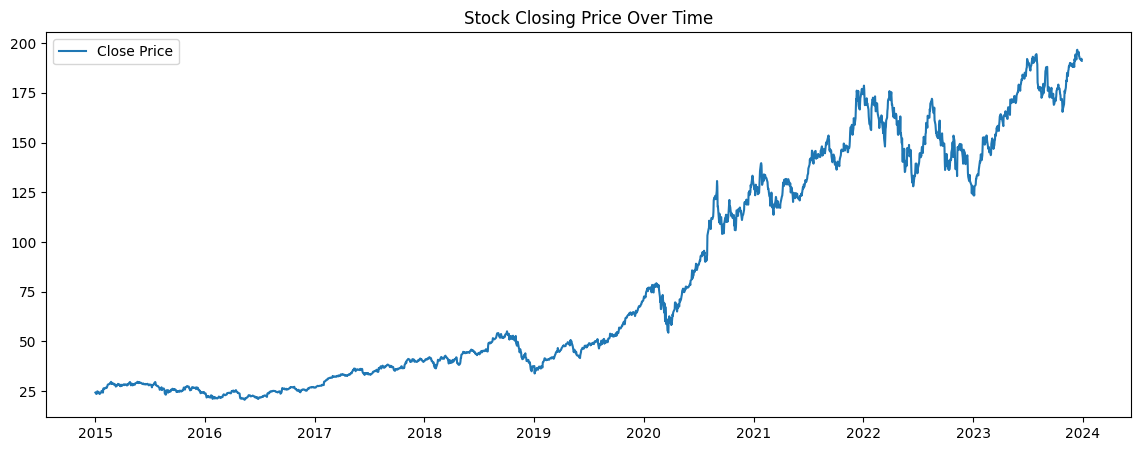

In [5]:
# Line plot
plt.figure(figsize=(14, 5))
plt.plot(data['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.legend()
plt.show()



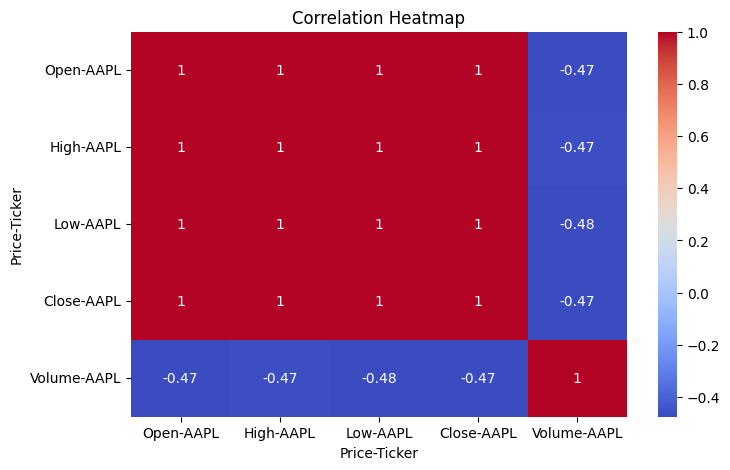

In [6]:
# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Supervised Learning

In [7]:
# Feature Engineering
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

X = data.drop('Target', axis=1)
y = data['Target']

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"{name} MAE: {mean_absolute_error(y_test, pred):.2f}, RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.2f}")


Linear Regression MAE: 2.14, RMSE: 2.82
Decision Tree MAE: 5.63, RMSE: 8.27


Unsupervised Learning

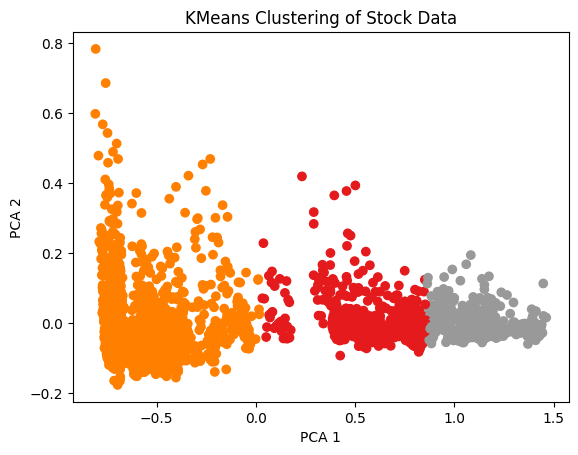

In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# KMeans Clustering
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(pca_data)

# Plot clusters
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='Set1')
plt.title('KMeans Clustering of Stock Data')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


Arima model

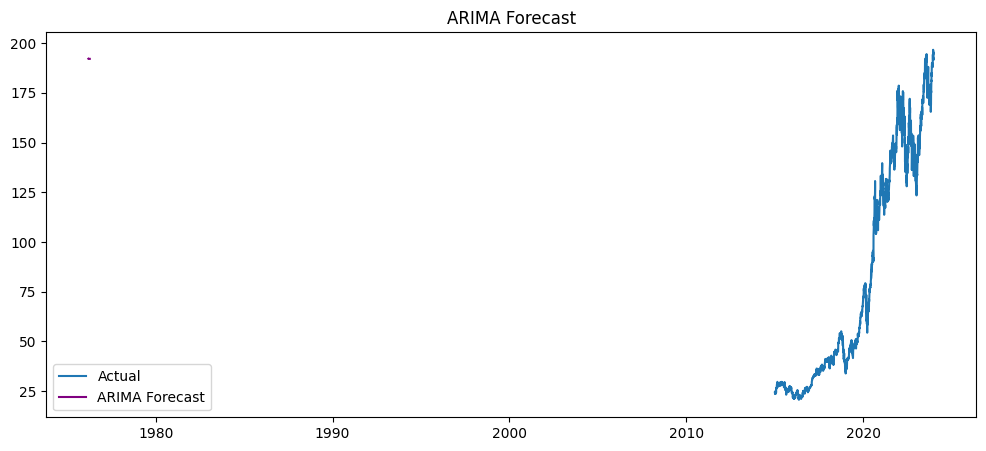

In [9]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(data['Close'], order=(5, 1, 0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=30)

plt.figure(figsize=(12, 5))
plt.plot(data['Close'], label='Actual')
plt.plot(arima_forecast.index, arima_forecast, label='ARIMA Forecast', color='purple')
plt.title("ARIMA Forecast")
plt.legend()
plt.show()

Sarima model

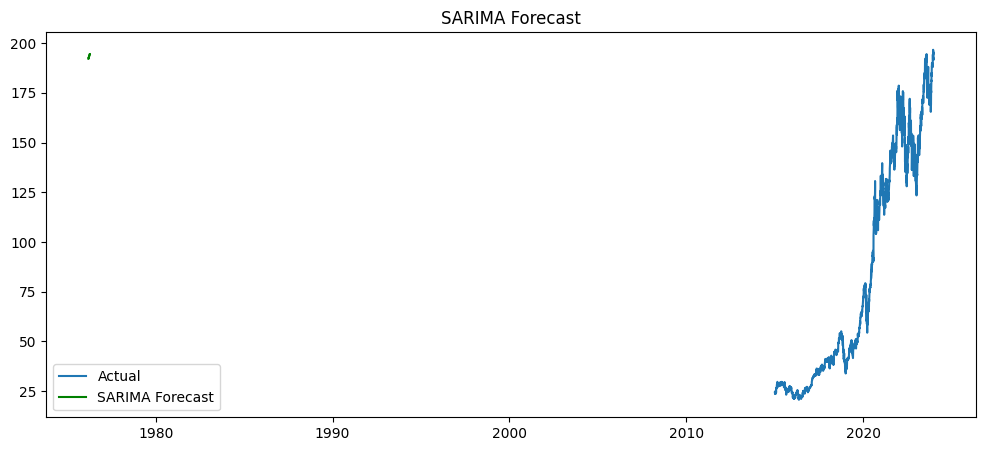

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(30)

plt.figure(figsize=(12, 5))
plt.plot(data['Close'], label='Actual')
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title("SARIMA Forecast")
plt.legend()
plt.show()


Prophet

In [11]:
prophet_df = data[['Close']].copy()
prophet_df.reset_index(inplace=True)
print(prophet_df.columns)


MultiIndex([( 'Date',     ''),
            ('Close', 'AAPL')],
           names=['Price', 'Ticker'])


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuzpx606m/wru1fpi0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuzpx606m/p473ic3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90245', 'data', 'file=/tmp/tmpuzpx606m/wru1fpi0.json', 'init=/tmp/tmpuzpx606m/p473ic3e.json', 'output', 'file=/tmp/tmpuzpx606m/prophet_modelbg6t4_oh/prophet_model-20250624081527.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:15:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:15:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


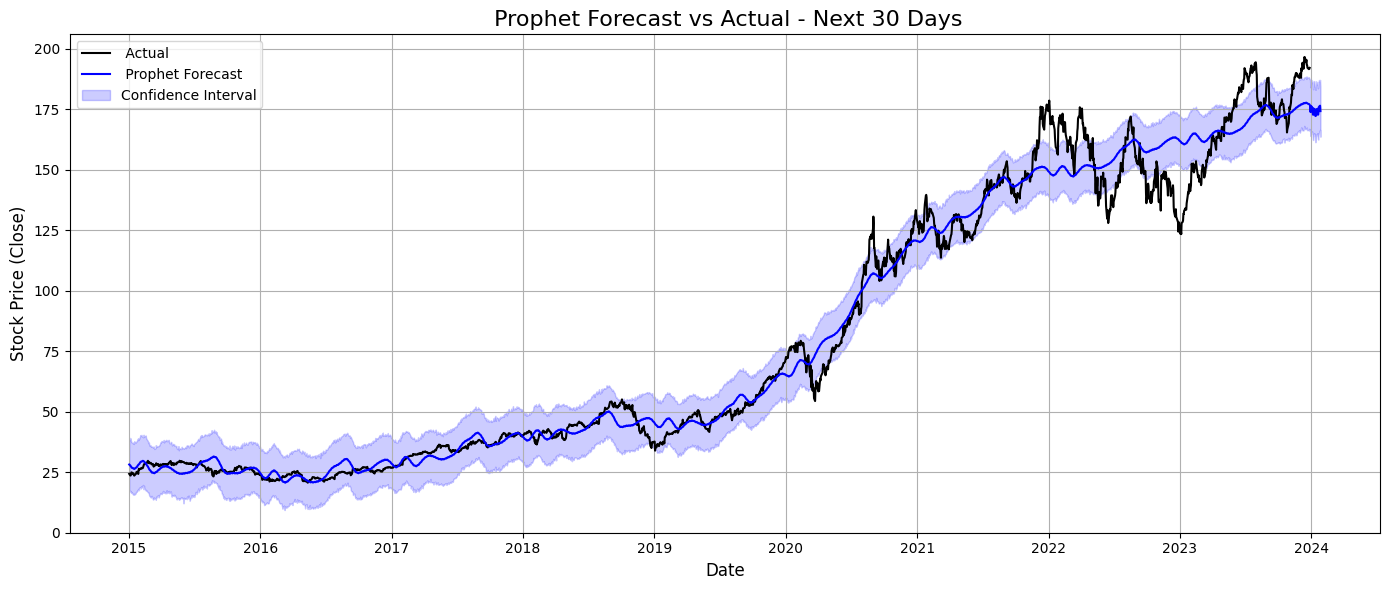

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Flatten MultiIndex if any
data.columns = data.columns.get_level_values(0)

# Prepare data for Prophet
prophet_df = data[['Close']].copy().reset_index()
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Ensure correct formats
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])
prophet_df['y'] = pd.to_numeric(prophet_df['y'], errors='coerce')
prophet_df.dropna(inplace=True)

# Train Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df)

# Create future dates and forecast
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)

# Plot custom chart with labels
plt.figure(figsize=(14, 6))

# Actual
plt.plot(prophet_df['ds'], prophet_df['y'], label=' Actual', color='black')

# Forecasted
plt.plot(forecast['ds'], forecast['yhat'], label=' Prophet Forecast', color='blue')

# Optional: confidence intervals
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2, label='Confidence Interval')

# Labels
plt.title(" Prophet Forecast vs Actual - Next 30 Days", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (Close)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


LSTM

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0248 - val_loss: 0.0014
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 3.7022e-04 - val_loss: 0.0013
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 3.4059e-04 - val_loss: 0.0018
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 3.2866e-04 - val_loss: 0.0013
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 3.7313e-04 - val_loss: 0.0013
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.3567e-04 - val_loss: 0.0015
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 3.0767e-04 - val_loss: 0.0024
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 3.6226e-04 - val_loss: 0.0013
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 3.1531e-04 - val_loss: 0.0012
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 3.1646e-04 - val_loss: 0.0010
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


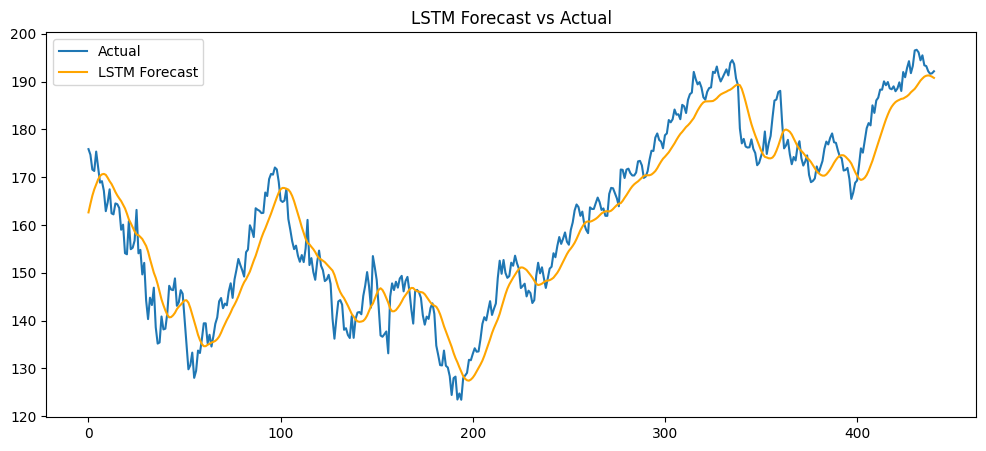

In [16]:
# Prepare data
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices)

# Sequence generation
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_sequences(scaled_close)
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Predictions
lstm_preds = model.predict(X_test)
lstm_preds_inv = scaler.inverse_transform(lstm_preds)
y_test_inv = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(lstm_preds_inv, label='LSTM Forecast', color='orange')
plt.title("LSTM Forecast vs Actual")
plt.legend()
plt.show()


Evaluation

In [17]:
# Prophet
prophet_forecast = forecast[['ds', 'yhat']].set_index('ds')[-30:]
actual_prophet = prophet_df.set_index('ds')['y'][-30:]
mae_prophet = mean_absolute_error(actual_prophet, prophet_forecast['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(actual_prophet, prophet_forecast['yhat']))

# ARIMA
actual_arima = data['Close'][-30:]
mae_arima = mean_absolute_error(actual_arima, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(actual_arima, arima_forecast))

# SARIMA
mae_sarima = mean_absolute_error(actual_arima, sarima_forecast)
rmse_sarima = np.sqrt(mean_squared_error(actual_arima, sarima_forecast))

# LSTM
mae_lstm = mean_absolute_error(y_test_inv, lstm_preds_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, lstm_preds_inv))

print("Model Evaluation (Last 30 Days Forecast)")
print(f"Prophet - MAE: {mae_prophet:.2f}, RMSE: {rmse_prophet:.2f}")
print(f"ARIMA   - MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}")
print(f"SARIMA  - MAE: {mae_sarima:.2f}, RMSE: {rmse_sarima:.2f}")
print(f"LSTM    - MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}")


Model Evaluation (Last 30 Days Forecast)
Prophet - MAE: 16.51, RMSE: 16.84
ARIMA   - MAE: 2.41, RMSE: 2.87
SARIMA  - MAE: 2.71, RMSE: 3.07
LSTM    - MAE: 4.74, RMSE: 5.57


Evaluation visualisation

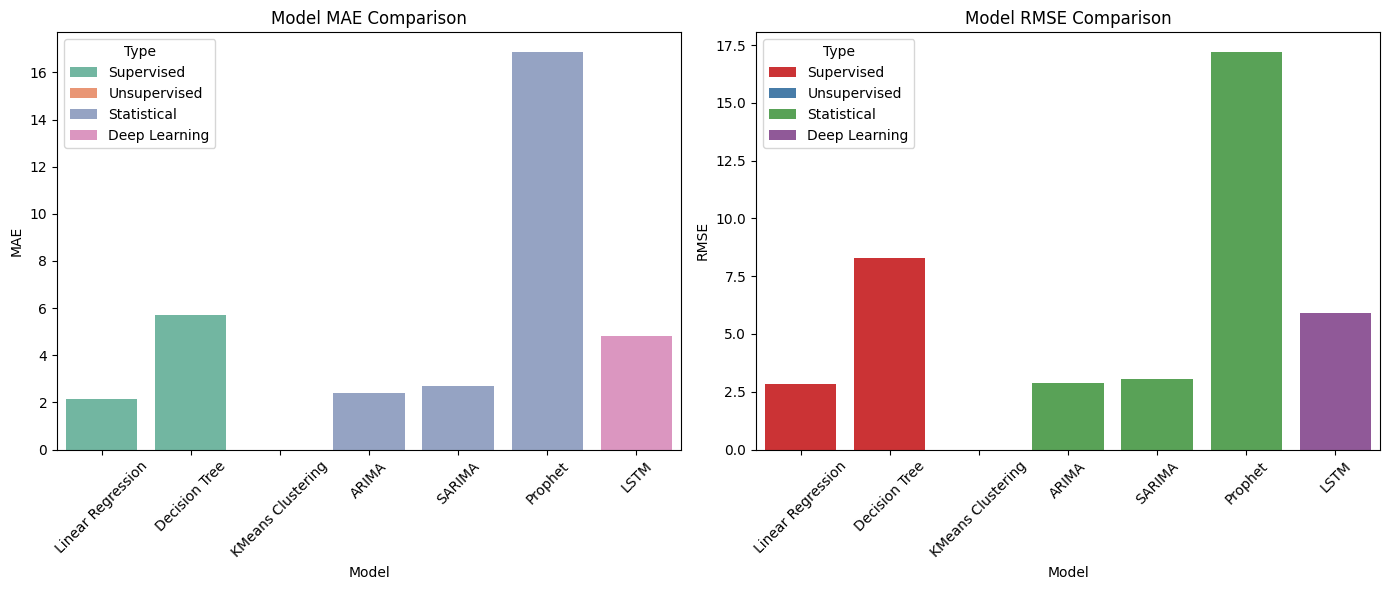

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these values with your actual results
performance_data = {
    'Model': [
        'Linear Regression', 'Decision Tree',
        'KMeans Clustering',
        'ARIMA', 'SARIMA', 'Prophet',
        'LSTM'
    ],
    'Type': [
        'Supervised', 'Supervised',
        'Unsupervised',
        'Statistical', 'Statistical', 'Statistical',
        'Deep Learning'
    ],
    'MAE': [2.14, 5.69, None, 2.41, 2.71, 16.86, 4.81],
    'RMSE': [2.82, 8.30, None, 2.87, 3.07, 17.19, 5.90]
}

df_perf = pd.DataFrame(performance_data)

# Plot MAE and RMSE
plt.figure(figsize=(14, 6))

# MAE plot
plt.subplot(1, 2, 1)
sns.barplot(data=df_perf, x='Model', y='MAE', hue='Type', dodge=False, palette='Set2')
plt.title('Model MAE Comparison')
plt.xticks(rotation=45)
plt.ylabel('MAE')
plt.xlabel('Model')

# RMSE plot
plt.subplot(1, 2, 2)
sns.barplot(data=df_perf, x='Model', y='RMSE', hue='Type', dodge=False, palette='Set1')
plt.title('Model RMSE Comparison')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.xlabel('Model')

plt.tight_layout()
plt.show()


Fine Tuning LSTM

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - loss: 0.0267 - val_loss: 0.0014
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 9.2348e-04 - val_loss: 0.0011
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 8.5541e-04 - val_loss: 0.0011
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 7.6723e-04 - val_loss: 0.0010
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 7.7090e-04 - val_loss: 0.0010
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 9.3910e-04 - val_loss: 0.0011
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - loss: 8.9966e-04 - val_loss: 9.1953e-04
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 7.7960e-04 - val_loss: 0.0028
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 7.5808e-04 - val_loss: 0.0014
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - loss: 7.0269e-04 - val_loss: 0.0017
Ep

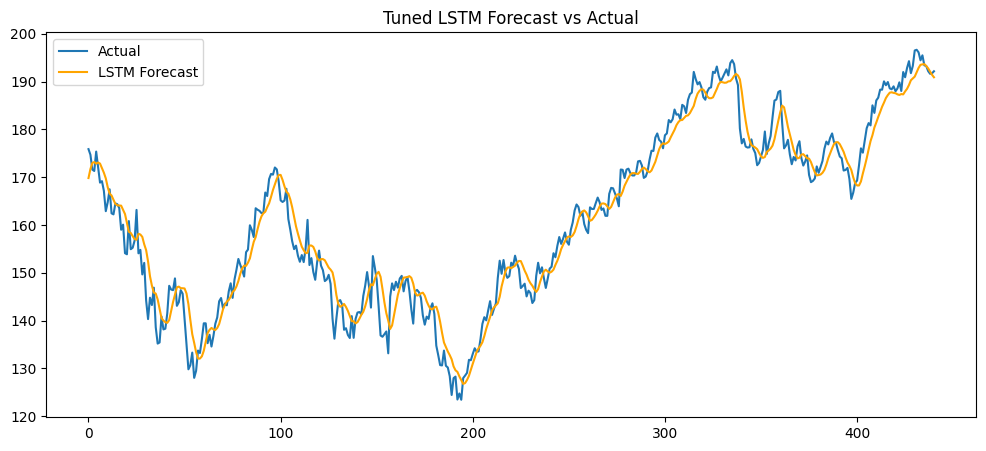

Tuned LSTM - MAE: 3.17, RMSE: 3.96


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Data prep
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices)

# Sequence generation
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_sequences(scaled_close)

# Reshape for LSTM
X_train, X_test = X_lstm[:int(0.8*len(X_lstm))], X_lstm[int(0.8*len(X_lstm)):]
y_train, y_test = y_lstm[:int(0.8*len(y_lstm))], y_lstm[int(0.8*len(y_lstm)):]

# Build model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# Predict
lstm_preds = model.predict(X_test)
lstm_preds_inv = scaler.inverse_transform(lstm_preds)
y_test_inv = scaler.inverse_transform(y_test)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(lstm_preds_inv, label='LSTM Forecast', color='orange')
plt.title("Tuned LSTM Forecast vs Actual")
plt.legend()
plt.show()

# Evaluate
mae_lstm = mean_absolute_error(y_test_inv, lstm_preds_inv)
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv, lstm_preds_inv))

print(f"Tuned LSTM - MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}")


BI-LSTM MODEL

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 240ms/step - loss: 0.0224 - val_loss: 0.0039
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 233ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 232ms/step - loss: 8.5293e-04 - val_loss: 0.0030
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - loss: 8.2242e-04 - val_loss: 0.0092
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 234ms/step - loss: 0.0015 - val_loss: 0.0051
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 236ms/step - loss: 6.6713e-04 - val_loss: 0.0017
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - loss: 6.3695e-04 - val_loss: 0.0025
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - loss: 5.7531e-04 - val_loss: 9.2634e-04
Epoch 10/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 227ms/step - loss: 6.2109e-04 - val_loss: 0.0012
Epoch 11/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - loss: 6.0650e-04 - val_loss: 0.001

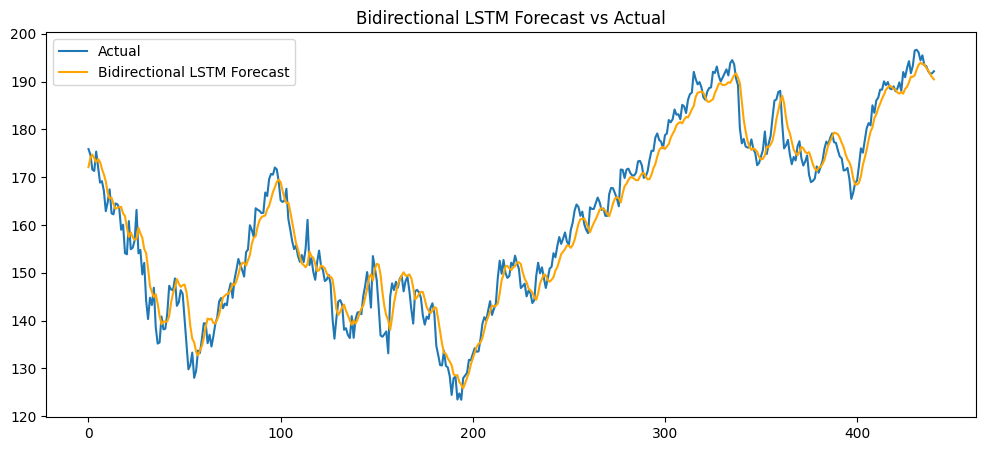

📊 Bidirectional LSTM - MAE: 2.88, RMSE: 3.65


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# 1. Prepare Data
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices)

# 2. Create Sequences
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_sequences(scaled_close, seq_len=60)

# 3. Train-Test Split
split = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

# 4. Build Bidirectional LSTM Model
model = Sequential()
model.add(Bidirectional(LSTM(100, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# 5. Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 6. Train Model
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# 7. Predictions
lstm_preds = model.predict(X_test)
lstm_preds_inv = scaler.inverse_transform(lstm_preds)
y_test_inv = scaler.inverse_transform(y_test)

# 8. Plot
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(lstm_preds_inv, label='Bidirectional LSTM Forecast', color='orange')
plt.title("Bidirectional LSTM Forecast vs Actual")
plt.legend()
plt.show()

# 9. Evaluation
mae_bilstm = mean_absolute_error(y_test_inv, lstm_preds_inv)
rmse_bilstm = np.sqrt(mean_squared_error(y_test_inv, lstm_preds_inv))

print(f"📊 Bidirectional LSTM - MAE: {mae_bilstm:.2f}, RMSE: {rmse_bilstm:.2f}")


COMPARING LSTM MODELS

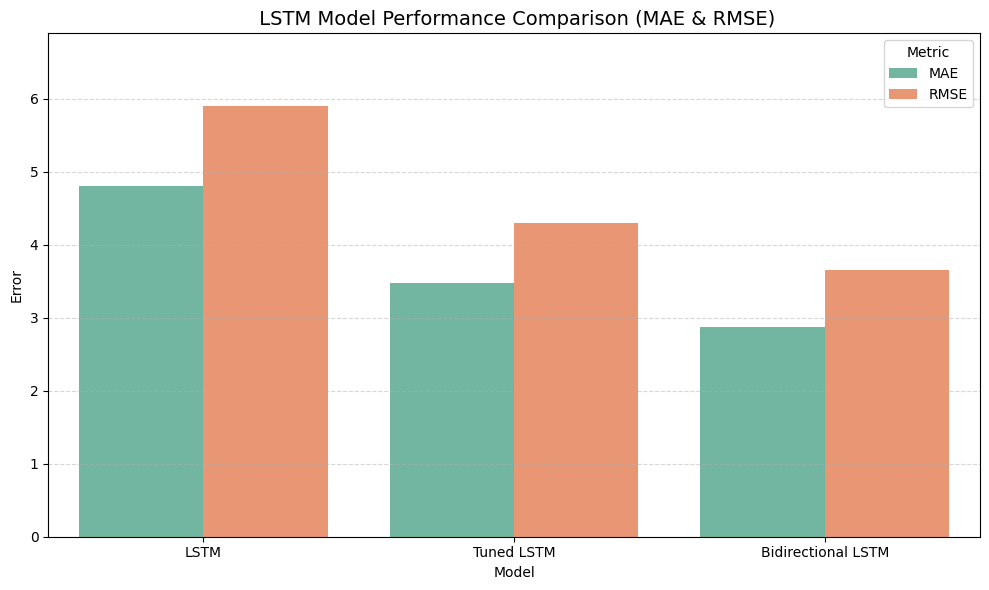

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
model_names = ['LSTM', 'Tuned LSTM', 'Bidirectional LSTM']
mae_values = [4.81, 3.48, 2.88]
rmse_values = [5.90, 4.30, 3.65]

# Create DataFrame for seaborn
df = pd.DataFrame({
    'Model': model_names * 2,
    'Metric': ['MAE'] * 3 + ['RMSE'] * 3,
    'Value': mae_values + rmse_values
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=df, palette='Set2')

# Labels and Title
plt.title(" LSTM Model Performance Comparison (MAE & RMSE)", fontsize=14)
plt.ylabel("Error")
plt.ylim(0, max(rmse_values) + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Metric")
plt.tight_layout()

# Show plot
plt.show()


FORECAST OF 30 DAYS WITH BI-LSTM

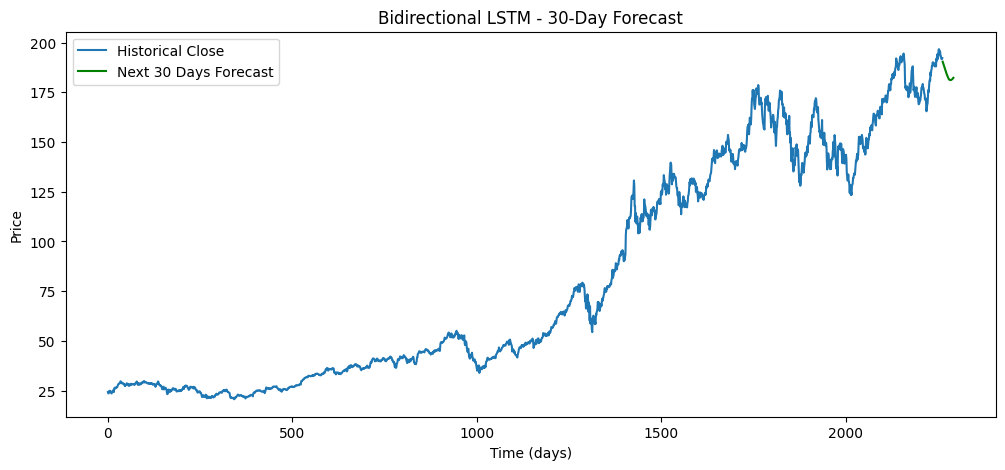

In [24]:
#  Forecast Next 30 Days
forecast_days = 30
last_60_days = scaled_close[-60:]  # shape: (60, 1)
future_preds = []

input_seq = last_60_days.copy()

for _ in range(forecast_days):
    input_reshaped = input_seq.reshape(1, 60, 1)
    pred = model.predict(input_reshaped, verbose=0)
    future_preds.append(pred[0, 0])
    input_seq = np.append(input_seq[1:], [[pred[0, 0]]], axis=0)  # move window

# Inverse scale the predictions
future_preds = np.array(future_preds).reshape(-1, 1)
future_preds_inv = scaler.inverse_transform(future_preds)

# 11. Plot Future Predictions
plt.figure(figsize=(12, 5))
plt.plot(range(len(close_prices)), close_prices, label='Historical Close')
plt.plot(range(len(close_prices), len(close_prices) + forecast_days), future_preds_inv, label='Next 30 Days Forecast', color='green')
plt.title("Bidirectional LSTM - 30-Day Forecast")
plt.xlabel("Time (days)")
plt.ylabel("Price")
plt.legend()
plt.show()


In [25]:
import pandas as pd
import numpy as np

# Convert actual historical close prices to DataFrame
actual_dates = pd.date_range(end=data.index[-1], periods=len(close_prices))
actual_df = pd.DataFrame({
    'Date': actual_dates,
    'Price': close_prices.flatten(),
    'Type': 'Actual'
})

# Create future dates for forecast
future_dates = pd.date_range(start=actual_dates[-1] + pd.Timedelta(days=1), periods=forecast_days)

# Convert forecast to DataFrame
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Price': future_preds_inv.flatten(),
    'Type': 'Forecast'
})

# Combine both
combined_df = pd.concat([actual_df, forecast_df], ignore_index=True)

# Save to CSV
combined_df.to_csv("lstm_forecast_30days.csv", index=False)

print("✅ Saved to lstm_forecast_30days.csv")


✅ Saved to lstm_forecast_30days.csv


DASHBOARD

In [42]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import altair as alt

st.set_page_config(page_title="📈 Stock Forecast Dashboard", layout="wide")
st.title("📊 Professional Stock Price 30 days Forecast Dashboard")

# Load data
data = pd.read_csv("lstm_forecast_30days.csv", parse_dates=["Date"])
data.set_index("Date", inplace=True)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data.dropna(subset=["Price"], how="all", inplace=True)

# Date Range Filter
st.sidebar.header("📅 Filter by Date")
min_date = data.index.min().date()
max_date = data.index.max().date()
start_date = st.sidebar.date_input("Start Date", min_value=min_date, max_value=max_date, value=min_date)
end_date = st.sidebar.date_input("End Date", min_value=min_date, max_value=max_date, value=max_date)

if start_date >= end_date:
    st.error("⚠️ End date must be after start date.")
    st.stop()

data_filtered = data.loc[str(start_date):str(end_date)]

# Forecast Point Selector
st.sidebar.header("🎯 Highlight Forecast Point")
forecast_only = data_filtered[data_filtered['Type'] == 'Forecast']
forecast_only = forecast_only['Price'].dropna()
forecast_date = None
selected_price = None

if not forecast_only.empty:
    forecast_date_input = st.sidebar.slider(
        "Select Date on Forecast Line",
        min_value=forecast_only.index.min().date(),
        max_value=forecast_only.index.max().date(),
        value=forecast_only.index.min().date(),
        format="YYYY-MM-DD"
    )
    forecast_date = pd.to_datetime(forecast_date_input)
    if forecast_date in forecast_only.index:
        selected_price = forecast_only.loc[forecast_date]
        st.sidebar.write(f"Forecast Price on {forecast_date.date()}: **${selected_price:.2f}**")

# Plotting
df_chart = data_filtered.reset_index().melt(
    id_vars=['Date', 'Type'],
    value_vars=['Price'],
    var_name='ValueType',
    value_name='Value'
).dropna(subset=['Value'])

chart = alt.Chart(df_chart).mark_line().encode(
    x=alt.X('Date:T', title='Date'),
    y=alt.Y('Value:Q', title='Price'),
    color='Type:N',
    tooltip=['Date:T', alt.Tooltip('Value:Q', title='Price'), 'Type:N']
).properties(
    title="Stock Price: Actual vs Forecast"
).interactive()

if forecast_date and selected_price is not None:
    highlight_point = alt.Chart(pd.DataFrame({
        'Date': [forecast_date],
        'Value': [selected_price],
        'Type': ['Forecast']
    })).mark_circle(size=100, color='red').encode(
        x='Date:T',
        y='Value:Q',
        tooltip=[alt.Tooltip('Date:T'), alt.Tooltip('Value:Q', title='Selected Forecast Price')]
    )
    chart += highlight_point

st.altair_chart(chart, use_container_width=True)

# Show raw data
if st.checkbox("Show raw data"):
    st.dataframe(data_filtered)


Writing streamlit_app.py


In [44]:
!pip install -q streamlit pyngrok

from pyngrok import ngrok
import time

# Kill any existing tunnels
ngrok.kill()

# Set your auth token
ngrok.set_auth_token("your_ngrok_token_here")

# Launch Streamlit app
PORT = 8501
!streamlit run streamlit_app.py --server.port {PORT} &> streamlit.log &

# Wait for Streamlit to start
time.sleep(5)

# Start ngrok tunnel
public_url = ngrok.connect(PORT)
print(f"✅ Streamlit is live at: {public_url}")


✅ Streamlit is live at: NgrokTunnel: "https://b7ae-34-71-179-86.ngrok-free.app" -> "http://localhost:8501"


# **Result**

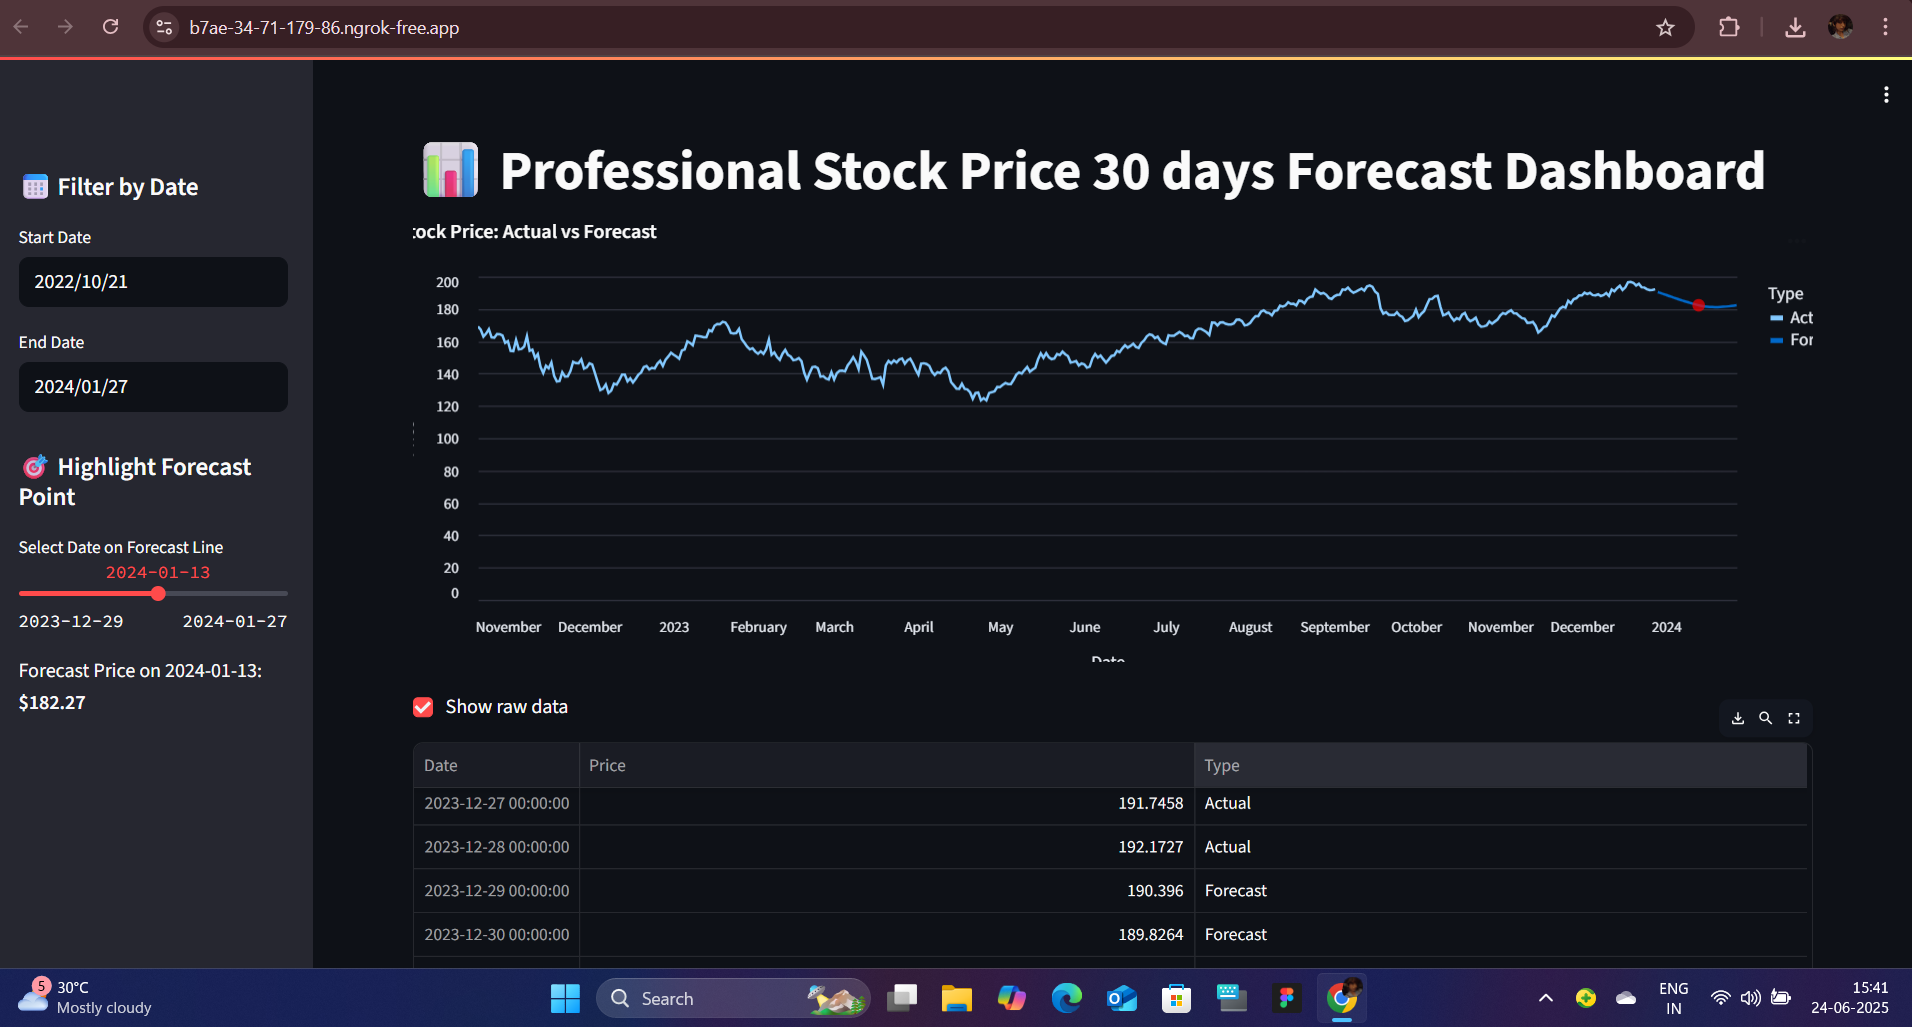